In [1]:
# Shiman Ding
# Python for Data Science
# HW1 

In [1]:
import numpy as np
import scipy
from scipy import signal
%pylab inline
from scipy.ndimage import imread

Populating the interactive namespace from numpy and matplotlib


1) find center of black dots

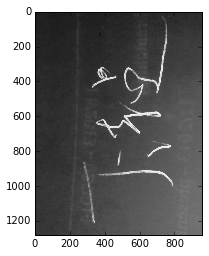

In [2]:
im=imread("Data/im1-a.png",flatten=True)
im=imread("Data/signiture.jpg",flatten=True)
imshow(im,cmap=cm.Greys)

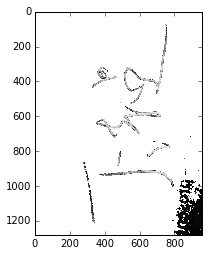

In [16]:
a = ma.masked_array(im, mask = (im >=170))
imshow(a,cmap=cm.Greys)

In [127]:
def findCenter(im):
    loc = np.argmin(im)
    r, c = np.shape(im)
    x = int(loc/r)
    y = loc - x * r
    return [x, y]

In [128]:
ima=imread("Data/im1-a.png",flatten=True)
imb=imread("Data/im1-b.png",flatten=True)
imc=imread("Data/im1-c.png",flatten=True)
imd=imread("Data/im1-d.png",flatten=True)
ime=imread("Data/im1-e.png",flatten=True)
centers = []
centers.append(tuple(findCenter(ima)))
centers.append(tuple(findCenter(imb)))
centers.append(tuple(findCenter(imc)))
centers.append(tuple(findCenter(imd)))
centers.append(tuple(findCenter(ime)))
print(centers)

[(71, 144), (71, 195), (66, 134), (76, 128), (76, 118)]


2) Using the location of the black dot in the first image, find the offset of the other images with respect to the first image. Using `scipy.ndimage.interpolation.shift` perform a shift on the other four images such that they are "registered" (aligned) with the first image. That is, make sure that the black dots are all in the same x,y location in the transformed images. Keep those images in `numpy` arrays (for the next part) but also save those images as `.png` files, appropriately named (`im1-b-shift.png`, `im1-c-shift.png`, etc.). Note: you'll need to think a bit about how you treat the edges in the `shift` operation.

In [136]:
scipy.ndimage.interpolation.shift?


In [129]:
def offset(imOpt, imIpt = im):
    centerOpt = np.array(findCenter(imOpt))
    centerIpt = np.array(findCenter(imIpt))
    return centerIpt - centerOpt

In [132]:
offset(imb)

array([  0, -51], dtype=int64)

In [133]:
def shift(im, name):
    image_array = scipy.ndimage.interpolation.shift(im, offset(im))
    scipy.misc.imsave(name, image_array);
    return image_array

In [188]:
shifa = shift(ima,'im1-a-shift.png');
shifb = shift(imb,'im1-b-shift.png');
shifc = shift(imc,'im1-c-shift.png');
shifd = shift(imd,'im1-d-shift.png');
shife = shift(ime,'im1-e-shift.png');

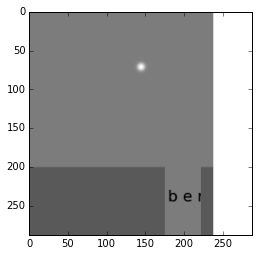

In [189]:
type(shifa)
imshow(shifb, cmap=cm.Greys)

3) Mask out the registered images by finding an appropriate `mask` for the grey-level regions making 5 new masked arrays like:
```python
new_masked_a = ma.masked_array(ima,mask=mask)
```
Combine the masked arrays using `np.ma.median` to reveal the hidden message.

In [208]:
new_masked_a = ma.masked_array(shifa, mask = (shifa <=183))
new_masked_b = ma.masked_array(shifb, mask = (shifb <=183))
new_masked_c = ma.masked_array(shifc, mask = (shifc <=183))
new_masked_d = ma.masked_array(shifd, mask = (shifd <=183))
new_masked_e = ma.masked_array(shife, mask = (shife <=183))

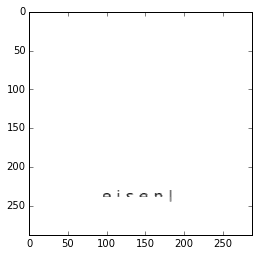

In [212]:
imshow(new_masked_d, cmap=cm.Greys)

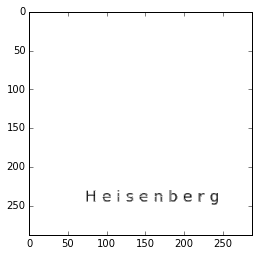

In [215]:
stacked = ma.array([new_masked_a,new_masked_b,new_masked_c,new_masked_d,new_masked_e])
imshow(np.ma.median(stacked, axis = 0),cmap=cm.Greys)

## HW 1-2
1) Resize each frame to be 3 times larger in each axis (ie. 9 times larger images). Using `scipy.signal.correlate2d` find the offsets of each frame with respect to the first frame. Report those offsets to 2 decimal places.

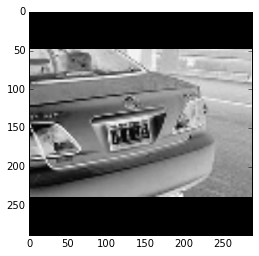

In [95]:
im=imread("Data/im2-0.png",flatten=True)
imshow(im,cmap=cm.Greys)

In [121]:
from PIL import Image
img = Image.open('Data/im2-0.png')    # Open image as PIL image object
rsize = img.resize((img.size[0]*3, img.size[1]*3), Image.ANTIALIAS) # Use PIL to resize
arr = np.asarray(img)
rsizeArr = np.asarray(rsize)  # Get array back

In [60]:
def resize3time(imgName):
    img = Image.open(imgName)    # Open image as PIL image object
    rsize = img.resize((img.size[0]*3, img.size[1]*3)) # Use PIL to resize
    arr = np.asarray(img)
    rsizeArr = np.asarray(rsize)  # Get array back
    return(arr, rsizeArr)

In [103]:
aa,bb = resize3time('Data/im2-1.png')

In [127]:
correlated = scipy.signal.correlate2d(aa[:,:,1],aa[:,:,1]

In [135]:
corr = correlated
y, x = np.unravel_index(np.argmax(corr), corr.shape)

In [139]:
scipy.signal.correlate2d?

In [140]:
from scipy import signal
from scipy import misc
lena = misc.lena() - misc.lena().mean()
template = np.copy(lena[235:295, 310:370]) # right eye
template -= template.mean()
lena = lena + np.random.randn(*lena.shape) * 50 # add noise
corr = signal.correlate2d(lena, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape) # find the matc

In [148]:
np.max(corr)

13610088.299589602